In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Проработаем различные сценарии и выделим месяцы в которые игры выпускат наиболее выгодно

In [ ]:
df_merged=pd.read_csv("merged_clean(last_version).csv", sep=';')
df_merged

1. Разобьем дату три колонки для более удобной работы

In [ ]:
s = pd.to_datetime(df_merged['release_date'], errors='coerce', dayfirst=False)
df_merged['release_year']  = s.dt.year.astype('Int64')
df_merged['release_month'] = s.dt.month.astype('Int64')
df_merged['release_day']   = s.dt.day.astype('Int64')
df_merged

2. Проверим на то какое количество пользователей ставят оценки и какие они

## Пусть продукт крупный (большой бюджет)

Отберем крупные релизы и потом проанализируем сезонность

In [ ]:
df_big= df_merged.copy()

In [ ]:
platform_count_all = (
    df_big['platforms_parsed']
    .str.split(r',+', regex=True)
    .str.len()
)

In [ ]:
mask = (df_big['user_score_amount'] > 600) & (platform_count_all >= 2)
df_big= df_big[mask]
df_big

In [ ]:

pivot = pd.pivot_table(
    df_big,
    index='release_month',
    columns='release_year',
    values='title',
    aggfunc='count',
    fill_value=0
)
pivot = pivot.reindex(range(1,13), fill_value=0)   # если некоторых месяцев нет, то будут нули
pivot.index = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
pivot

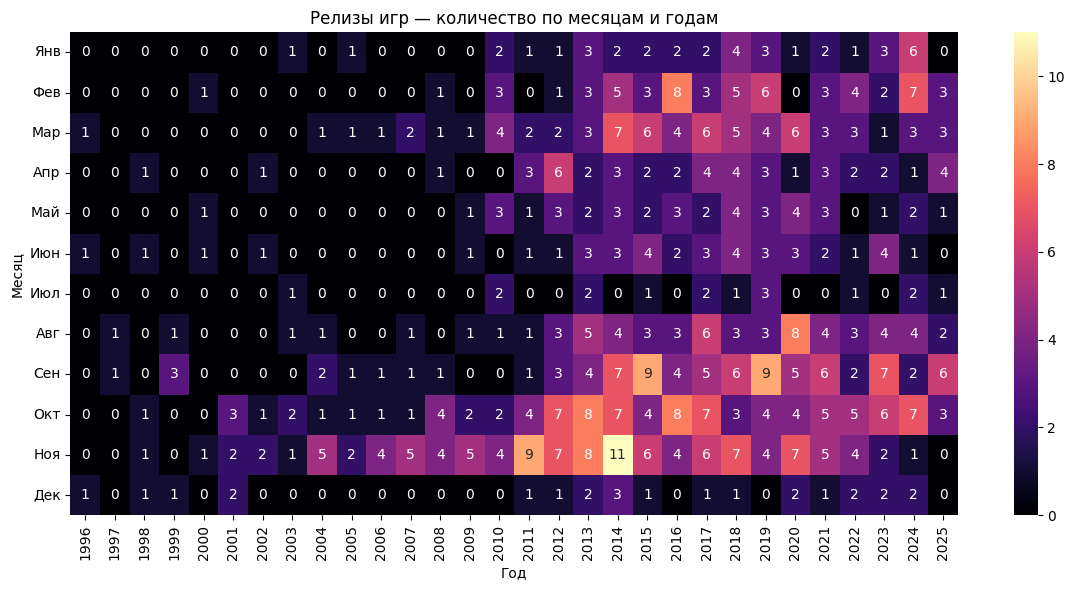

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    cmap='magma'
)
plt.title('Релизы игр — количество по месяцам и годам')
plt.xlabel('Год')
plt.ylabel('Месяц')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-3785744657.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data, labels=labels)


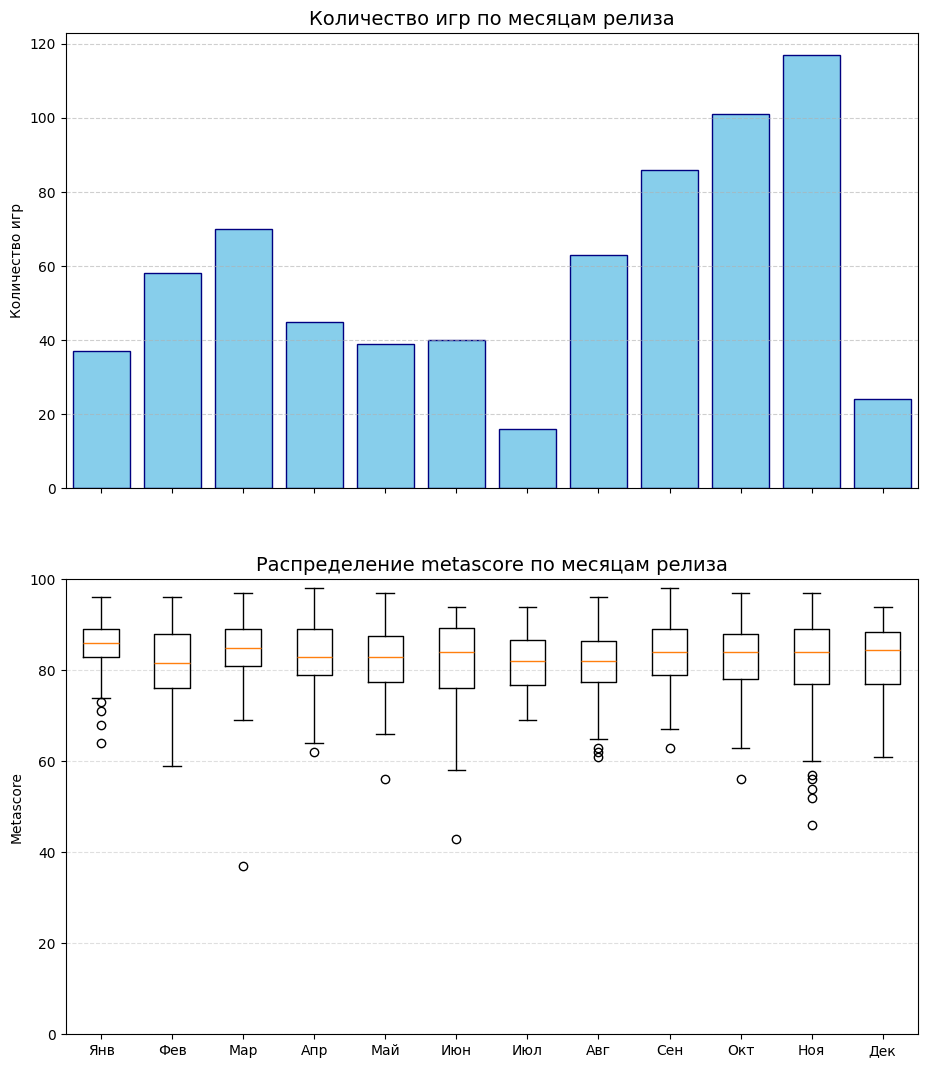

In [ ]:
df_big_1= df_big.groupby('release_month')['title'].count()
data = []
for m in range(1, 13):
    vals = df_big.loc[df_big['release_month'] == m, 'metascore'].values
    data.append(vals)
labels = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
fig, axes = plt.subplots(2, 1, figsize=(11, 13), sharex=True)
axes[0].bar(df_big_1.index, df_big_1.values, color='skyblue', edgecolor='navy', linewidth=1.0, )
axes[0].set_title('Количество игр по месяцам релиза', fontsize=14)
axes[0].set_ylabel('Количество игр')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].boxplot(data, labels=labels)
axes[1].set_title('Распределение metascore по месяцам релиза', fontsize=14)
axes[1].set_ylabel('Metascore')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.4)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(labels)

plt.show()

***Если вы топ-франшиза/ААА с тяжёлым маркетингом:***

*	Окно «праздничного спроса»: **середина октября — середина ноября**.

Это место максимального кошелька аудитории, но и максимального шума. Подходит, если вы уверены в масштабе кампании и готовности билда.
* Риск: ценовая и инфоповесточная конкуренция, более широкий разброс оценок в ноябре.

***Если вы крупная игра, но без статуса на рынке и не имеете проект, который по масштабу сможет обойти игры крупных студий:***

*  Главное окно: **конец февраля — апрель**.

Релизов меньше, медианы метаскоров высокие и стабильные → легче получить внимание прессы и «длинный хвост» продаж.

*  Альтернатива: **август**.

Хороший компромисс: уже рынок начинает греться перед сезоном, а до осенней конкуренции ещё есть время набрать обзоры, патчи, отзывы и выбиться в чарты.

***Когда лучше избегать:***
*  **Ноябрь** — только при безупречной готовности и очень сильном маркетинге (повышенный риск по разбросу оценок и сильная конкуренция).
*  **Декабрь** — мало релизов в выборке; окно нестабильное.

## Пусть продукт средний (средний бюджет бюджет)

Отберем средние релизы и потом проанализируем сезонность

In [ ]:
df_sred= df_merged.copy()

In [ ]:
platform_count_all = (
    df_sred['platforms_parsed']
    .str.split(r',+', regex=True)
    .str.len()
)

In [ ]:
mask = (df_sred['user_score_amount'] > 200) & (df_sred['user_score_amount'] <600) & (platform_count_all >= 2)
df_sred= df_sred[mask]
df_sred

In [ ]:
pivot = pd.pivot_table(
    df_sred,
    index='release_month',
    columns='release_year',
    values='title',
    aggfunc='count',
    fill_value=0
)
pivot = pivot.reindex(range(1,13), fill_value=0)   # если некоторых месяцев нет, то будут нули
pivot.index = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
pivot

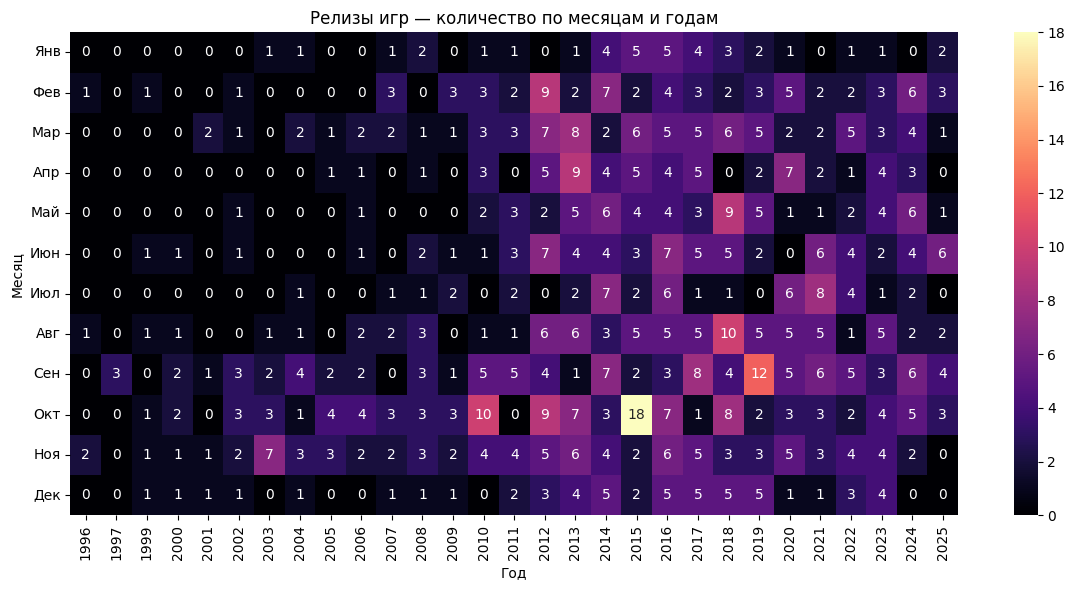

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    cmap='magma'
)
plt.title('Релизы игр — количество по месяцам и годам')
plt.xlabel('Год')
plt.ylabel('Месяц')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-49100236.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data, labels=labels)


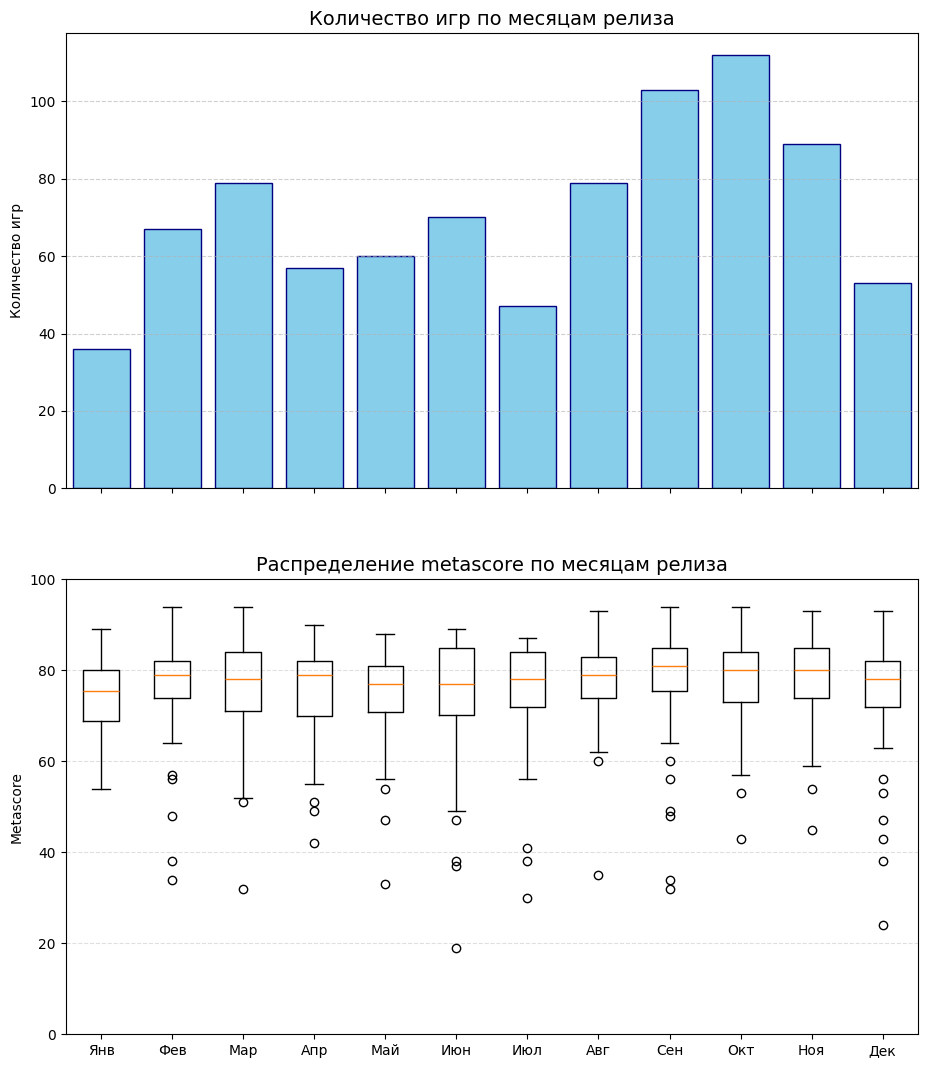

In [ ]:
df_sred_1= df_sred.groupby('release_month')['title'].count()
data = []
for m in range(1, 13):
    vals = df_sred.loc[df_sred['release_month'] == m, 'metascore'].values
    data.append(vals)
labels = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
fig, axes = plt.subplots(2, 1, figsize=(11, 13), sharex=True)
axes[0].bar(df_sred_1.index, df_sred_1.values, color='skyblue', edgecolor='navy', linewidth=1.0, )
axes[0].set_title('Количество игр по месяцам релиза', fontsize=14)
axes[0].set_ylabel('Количество игр')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].boxplot(data, labels=labels)
axes[1].set_title('Распределение metascore по месяцам релиза', fontsize=14)
axes[1].set_ylabel('Metascore')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.4)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(labels)

plt.show()

***Рекомендация для mid-budget***

* Лучшее окно: **конец мая → июль** (приоритет — июнь/июль).

Здесь меньше релизов (значит больше воздуха для пресс-охвата и витрин), при этом boxplot не хуже, чем в «топ-сезоне». Плюс есть 6–10 недель до осенней конкуренции, чтобы: добрать обзоры, выпустить 1–2 патча.


***Чего избегать для среднего бюджета***
* Сентябрь–ноябрь —это «самая плотная» зона: легко утонуть на фоне тяжёлых брендов
* Декабрь — выборка маленькая, окно нестабильное (часто уже всё внимание на скидки на крупные проекты, они тянут на себя большую аудиторию).


## Пусть продукт мелкий (маленький бюджет)

Отберем мелкие релизы и потом проанализируем сезонность

In [ ]:
df_little= df_merged.copy()

In [ ]:
platform_count_all = (
    df_little['platforms_parsed']
    .str.split(r',+', regex=True)
    .str.len()
)

In [ ]:
mask = (df_little['user_score_amount'] < 200)
df_little= df_little[mask]
df_little

In [ ]:
pivot = pd.pivot_table(
    df_little,
    index='release_month',
    columns='release_year',
    values='title',
    aggfunc='count',
    fill_value=0
)
pivot = pivot.reindex(range(1,13), fill_value=0)   # если некоторых месяцев нет, то будут нули
pivot.index = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
pivot

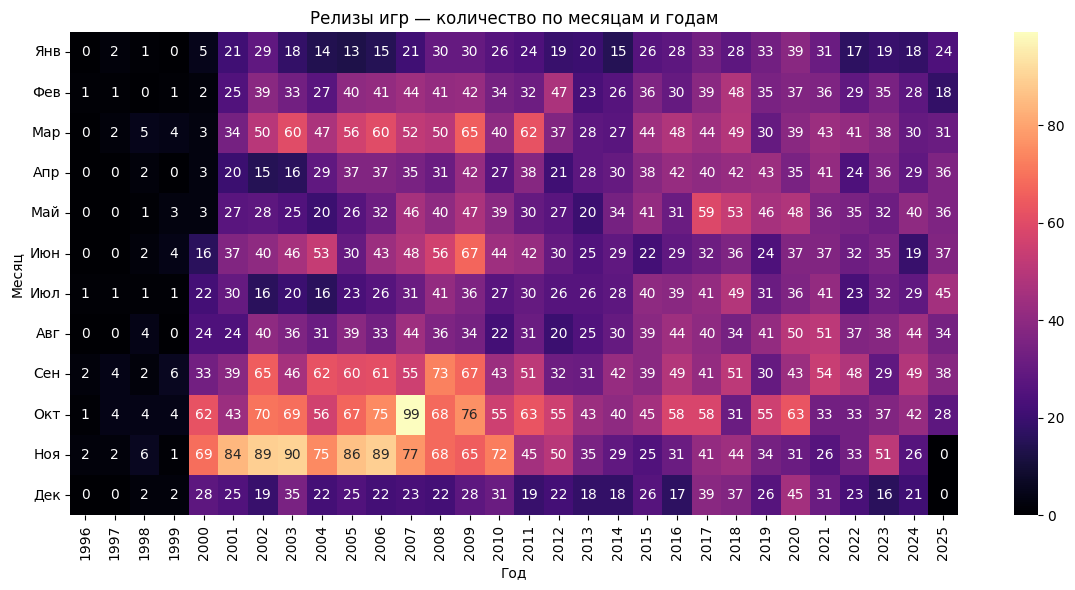

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    cmap='magma'
)
plt.title('Релизы игр — количество по месяцам и годам')
plt.xlabel('Год')
plt.ylabel('Месяц')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-238608497.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(data, labels=labels)


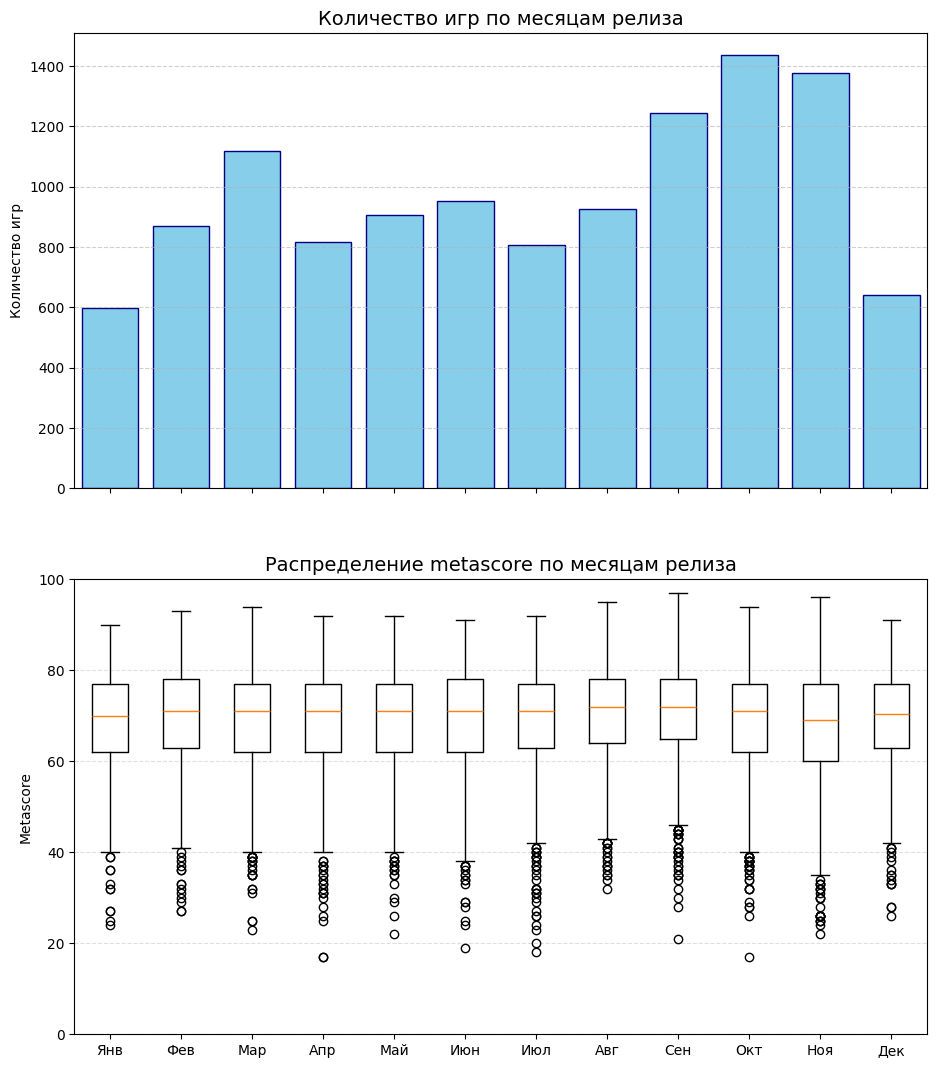

In [ ]:
df_little_1= df_little.groupby('release_month')['title'].count()
data = []
for m in range(1, 13):
    vals = df_little.loc[df_little['release_month'] == m, 'metascore'].dropna().values
    data.append(vals)
labels = ['Янв','Фев','Мар','Апр','Май','Июн','Июл','Авг','Сен','Окт','Ноя','Дек']
fig, axes = plt.subplots(2, 1, figsize=(11, 13), sharex=True)
axes[0].bar(df_little_1.index, df_little_1.values, color='skyblue', edgecolor='navy', linewidth=1.0, )
axes[0].set_title('Количество игр по месяцам релиза', fontsize=14)
axes[0].set_ylabel('Количество игр')
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].boxplot(data, labels=labels)
axes[1].set_title('Распределение metascore по месяцам релиза', fontsize=14)
axes[1].set_ylabel('Metascore')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.4)
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(labels)

plt.show()

Использовал дополнительный метод dropna, потому что пропусков 0.3 процента

In [ ]:
nan= ((df_little['metascore'].isna().sum())/ (len(df_little))) *100
print(f'процент пропусков в столбце metascore: {nan}')

процент пропусков в столбце metascore: 0.3070624360286591


***Рекомендованные окна для мелких релизов:***
1.  Январь
*   На графиках — один из самых «тихих» месяцев.
*   Высокая видимость при умеренной выборке; метаскор не проседает.
2.  Апрель–июнь (без ярко выраженных пиков)
*   Конкуренция ниже, чем осенью и в марте; boxplot ровный.
*   Есть время накопить обзоры/отзывы до осенней «мясорубки».
3.  Август
*   Умеренная конкуренция; за 3–4 недели до сентябрьского всплеска успеешь собрать упоминания и патчи.

***Чего избегать маленькой игре:***
*   Октябрь–ноябрь — максимум релизов почти каждый год; по boxplot в ноябре ещё и широкий разброс (высокий риск «потеряться» и просадить оценку).
*   Сентябрь — очень плотный поток.
*   Март — заметный всплеск релизов.